## imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# ToxCast

## Splitting Data

In [3]:
df = pd.read_csv('final_toxcast.csv')

In [4]:
X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

## Modeling

#### Metric Functions

In [5]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score = ", f1_score(y_actual, y_predicted))
    display(
        pd.crosstab(y_actual,
                    y_predicted,
                    rownames=["Actual"],
                    colnames=["Predicted"]))


def generate_auc_roc_curve(clf, X_test, y_test):
    sns.set(style="darkgrid")
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(dpi=100)
    plt.plot(fpr,
             tpr,
             label="AUC ROC Curve with Area Under the curve =%.2f" % auc)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

### Random Forrest Classifier

In [6]:
grid = {'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5]}

In [7]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

random_forrest_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=grid,
                           n_jobs=-1,
                           cv=cv,
                           scoring='roc_auc',
                           verbose=2)

In [8]:
random_forrest_grid_search.fit(X_train, y_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='roc_auc', verbose=2)

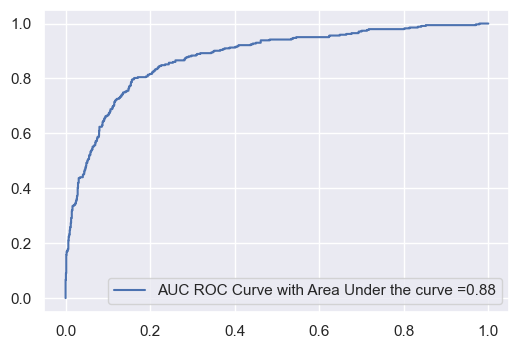

Accuracy =  0.8506700701978303
Precision =  0.7011070110701108
Recall =  0.5539358600583091
F1 Score =  0.6188925081433225


Predicted,0.0,1.0
Actual,,
0.0,1143,81
1.0,153,190


In [9]:
y_hat = random_forrest_grid_search.predict(X_test)
generate_auc_roc_curve(random_forrest_grid_search, X_test, y_test)
generate_model_report(y_test, y_hat)

In [12]:
roc_auc_score(y_test, random_forrest_grid_search.predict_proba(X_test)[:, 1])

0.8780964766859125

In [13]:
roc_auc_score(y_train, random_forrest_grid_search.predict_proba(X_train)[:, 1])

0.9999740756015056

# QM9

## Modeling

In [15]:
qm9 = pd.read_csv('final_qm9.csv')

In [16]:
qm9.head()

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)",...,"('fr_piperzine', <class 'numpy.float64'>)","('fr_priamide', <class 'numpy.float64'>)","('fr_pyridine', <class 'numpy.float64'>)","('fr_quatN', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)",lable
0,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.187493,-40.478930
1,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.228070,-56.525887
2,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.156089,-76.404702
3,0.974937,0.000625,1.574798e-06,2.191668e-09,2.296717e-07,1.101184e-06,1.498512e-07,0.000038,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,1.000000e+00,0.168378,4.703598e-08,0.166633,0.160976,-77.308427
4,0.974937,0.000646,1.574798e-06,7.501717e-11,1.174156e-07,1.101184e-06,5.282567e-08,0.000033,0.000001,2.209078e-07,...,0.0,8.336725e-25,0.156951,4.034345e-08,2.957989e-11,0.168378,4.703598e-08,0.166633,0.197878,-93.411888


In [53]:
X = qm9.drop(['lable'], axis=1)
y = qm9['lable']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Random Forrest Regressor

In [55]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_hat2 = rf_regressor.predict(X_test)

In [56]:
print(r2_score(rf_regressor.predict(X_train) , y_train))

0.9999587606497973


In [23]:
print(r2_score(y_hat2 , y_test))

0.9994079020222398


# Tox21

In [14]:
X = pd.read_csv('tox21_x.csv')
y = pd.read_csv('tox21_y.csv')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y['NR-AR'],
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

## Modeling

### Random Forrest Classifier

In [16]:
grid = {'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5]}

In [17]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

random_forrest_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=grid,
                           n_jobs=-1,
                           cv=cv,
                           scoring='roc_auc',
                           verbose=2)

In [18]:
random_forrest_grid_search.fit(X_train, y_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='roc_auc', verbose=2)

#### Train Score

In [19]:
roc_auc_score(random_forrest_grid_search.predict(X_train) , y_train)

0.987779047075063

#### Test Score

In [22]:
roc_auc_score(random_forrest_grid_search.predict(X_test) , y_test)

0.9421357742181541

#### Roc-Auc Curve

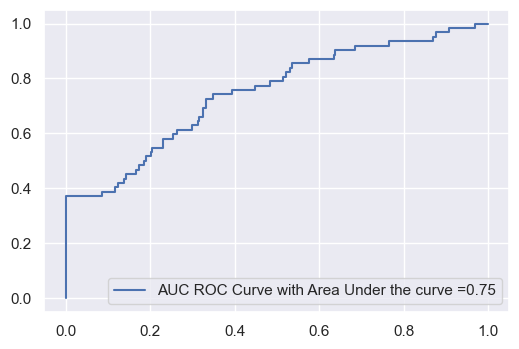

Accuracy =  0.9703038674033149
Precision =  0.9130434782608695
Recall =  0.3387096774193548
F1 Score =  0.49411764705882344


Predicted,0.0,1.0
Actual,,
0.0,1384,2
1.0,41,21


In [21]:
y_hat = random_forrest_grid_search.predict(X_test)
generate_auc_roc_curve(random_forrest_grid_search, X_test, y_test)
generate_model_report(y_test, y_hat)